# 의류 이미지 분류에 Keras 사용하기

* 3-5 챕터에서 사용한 Fashion MNIST를 Keras로 다뤄본다.
* Keras는 오픈소스 머신러닝 플랫폼 (https://keras.io/)

In [16]:
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print(train_images.shape)
print(train_labels)

print(test_images.shape)
print(test_labels)

(60000, 28, 28)
[9 0 0 ... 3 0 5]
(10000, 28, 28)
[9 2 1 ... 8 1 5]


## 데이터 전처리하기

* 0~255 범위인 픽셀값을 0~1 범위로 정규화한다.

In [17]:
train_images = train_images / 255.0
test_images = test_images / 255.0

class_names = ['T-shirts', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 신경망 모델 구성하기

* `Sequential`: 레이어를 하나씩 쌓아 만드는 모델 구조
* `Flatten`: 2차원 배열의 이미지 포맷을 1차원 배열로 변환
  * 활성화 함수에 softmax를 사용함.
* `Dense`: 신경망 레이어 (직전 레이어의 각 노드가 현재 레이어의 모든 노드와 연결됨)
  * 활성화 함수에 ReLU를 사용함.

In [18]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Sequential

model = Sequential([
    Flatten(input_shape=(28, 28)), # input layer
    Dense(100, activation='relu'), # hidden layer
    Dense(10, activation='softmax'), # output layer
])

## 신경망 모델 컴파일하기

* `loss`: 손실비용함수
* `optimizer`: 데이터와 손실비용함수를 바탕으로 모델의 업데이트 방법 결정
* `metrics`: training/test 단계 모니터링

In [19]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

## 신경망 모델 학습하기

* 모델이 훈련 데이터를 학습한다.
* 훈련 데이터를 모델에 입력하면 모델이 이미지와 레이블을 매핑하는 방법을 학습.

In [20]:
history = model.fit(train_images, train_labels, epochs=100)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5041 - accuracy: 0.8230

## 정확도 평가하기

* 학습이 완료된 후 테스트 데이터셋을 사용해 모델의 정확도를 검증한다.
* 모델이 틀린 예측을 한 건수를 기반으로 정확도를 평가한다.

313/313 - 0s - loss: 0.3301 - accuracy: 0.8807
test accuracy:  0.8806999921798706


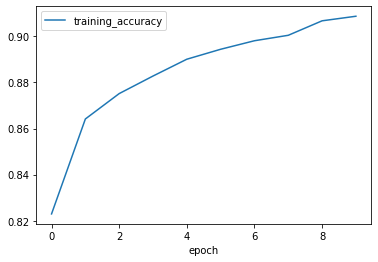

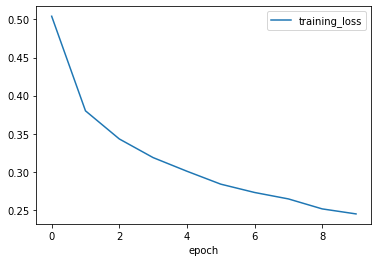

In [24]:
import matplotlib.pyplot as plt

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("test accuracy: ", test_acc)

plt.xlabel('epoch')
plt.plot(history.history['accuracy'], label='training_accuracy')
plt.legend()
plt.show()

plt.xlabel('epoch')
plt.plot(history.history['loss'], label='training_loss')
plt.legend()
plt.show()

## 이미지 예측하기

* 훈련된 모델을 사용해 실제로 의류 사진의 카테고리를 예측해본다.
* 신뢰도(confidence) 값 중 가장 큰 값이 예측값이 된다.

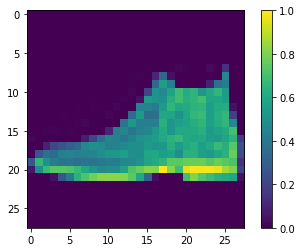

prediction:  Ankle boot


In [34]:
import numpy as np

target_index = 0 # Ankle boot

predictions = model.predict(test_images)
confidence = predictions[target_index]
prediction = np.argmax(predictions[target_index])

plt.imshow(test_images[target_index])
plt.colorbar()
plt.show()

print("prediction: ", class_names[prediction])